In [1]:
import requests
import pandas as pd
import csv
import json
import ast

In [2]:
#match_details_df.to_csv("all_match_details_df.csv", index=False)

In [3]:
match_details_df = pd.read_csv(r'/Users/kanimozhivelusamy/Downloads/match_details.csv')
match_details_df.head(500)

,version,match_id,draft_timings,teamfights,objectives,chat,radiant_gold_adv,radiant_xp_adv,cosmetics,players,...,region,all_word_counts,my_word_counts,throw,loss,replay_url,radiant_team,dire_team,comeback,stomp
0,21,7694225732,"[{'order': 1, 'pick': False, 'active_team': 3,...","[{'start': 547, 'end': 590, 'last_death': 575,...","[{'time': 180, 'type': 'CHAT_MESSAGE_FIRSTBLOO...","[{'time': -698, 'type': 'chatwheel', 'key': '5...","[0, 228, 308, 285, 1850, 1809, 1778, 2942, 437...","[0, 29, 235, 203, 1454, 1180, 1398, 2602, 2610...","{'630': 0, '647': 130, '4404': 129, '5128': 12...","[{'player_slot': 0, 'obs_placed': 4, 'sen_plac...",...,5.0,"{'srry': 1, 'sorry': 2, 'misclick': 1, 'sry': ...",{},0.0,30252.0,http://replay151.valve.net/570/7694225732_3171...,NaN,NaN,NaN,NaN
1,21,7694200826,"[{'order': 1, 'pick': False, 'active_team': 3,...","[{'start': 357, 'end': 411, 'last_death': 396,...","[{'time': 105, 'type': 'CHAT_MESSAGE_FIRSTBLOO...","[{'time': 118, 'type': 'chatwheel', 'key': '71...","[-100, -158, -581, -291, -344, -753, -1026, -1...","[-70, -121, 36, -30, -112, -423, -848, -1535, ...","{'647': 132, '4379': 130, '4380': 130, '4765':...","[{'player_slot': 0, 'obs_placed': 0, 'sen_plac...",...,5.0,{'gg': 5},{},1839.0,26240.0,http://replay154.valve.net/570/7694200826_7421...,"{'team_id': 9025359, 'name': 'The Covenant', '...",NaN,NaN,NaN
2,21,7694154386,"[{'order': 1, 'pick': False, 'active_team': 3,...","[{'start': 1268, 'end': 1341, 'last_death': 13...","[{'time': 122, 'type': 'CHAT_MESSAGE_COURIER_L...","[{'time': 181, 'type': 'chatwheel', 'key': '62...","[0, 37, -49, -139, -634, 982, 1313, 1717, 2144...","[0, 79, 311, 176, 318, 1709, 2074, 1979, 2353,...","{'4383': 3, '7339': 2, '7341': 2, '7342': 2, '...","[{'player_slot': 0, 'obs_placed': 3, 'sen_plac...",...,3.0,{'gg': 1},{},634.0,16338.0,http://replay271.valve.net/570/7694154386_1229...,"{'team_id': 8849990, 'name': 'REAL ECLIPSE', '...","{'team_id': 8957156, 'name': 'Silent killer', ...",NaN,NaN
3,21,7694115103,"[{'order': 1, 'pick': False, 'active_team': 3,...","[{'start': 911, 'end': 957, 'last_death': 942,...","[{'time': 18, 'type': 'CHAT_MESSAGE_FIRSTBLOOD...","[{'time': -34, 'type': 'chat', 'key': 'gl hf',...","[0, 554, 539, 889, 1361, 1821, 2635, 3195, 252...","[0, 231, 49, 484, 665, 1046, 1647, 1646, 952, ...","{'4289': 128, '4290': 128, '4291': 128, '4383'...","[{'player_slot': 0, 'obs_placed': 2, 'sen_plac...",...,3.0,"{'gl': 3, 'hf': 1, 'sk': 1, 'itras': 1, 'g': 1}",{},9236.0,6158.0,http://replay274.valve.net/570/7694115103_2588...,"{'team_id': 8957156, 'name': 'Silent killer', ...","{'team_id': 8849990, 'name': 'REAL ECLIPSE', '...",NaN,NaN
4,21,7694080485,"[{'order': 1, 'pick': False, 'active_team': 3,...","[{'start': 1204, 'end': 1248, 'last_death': 12...","[{'time': 92, 'type': 'CHAT_MESSAGE_FIRSTBLOOD...","[{'time': -358, 'type': 'chatwheel', 'key': '7...","[0, 68, -92, 1005, 774, 1434, 825, 1133, 830, ...","[0, 145, 14, 801, 680, 1123, 597, 714, 822, 92...","{'4383': 2, '6400': 128, '6401': 128, '6402': ...","[{'player_slot': 0, 'obs_placed': 0, 'sen_plac...",...,3.0,{'gg': 1},{},7560.0,7345.0,http://replay273.valve.net/570/7694080485_3030...,"{'team_id': 8849990, 'name': 'REAL ECLIPSE', '...","{'team_id': 8957156, 'name': 'Silent killer', ...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,21,7681538176,"[{'order': 1, 'pick': False, 'active_team': 3,...","[{'start': 480, 'end': 532, 'last_death': 517,...","[{'time': 155, 'type': 'CHAT_MESSAGE_FIRSTBLOO...","[{'time': -74, 'type': 'chat', 'key': 'g', 'sl...","[0, 70, 316, -119, 370, 503, 170, -99, 70, -18...","[0, 114, 46, -250, 191, 153, 110, 86, 757, 715...","{'4838': 130, '5243': 0, '5921': 129, '5922': ...","[{'player_slot': 0, 'obs_placed': 7, 'sen_plac...",...,3.0,"{'g': 1, 'gg': 1, 'wp': 1}",{},NaN,NaN,http://replay271.valve.net/570/7681538176_2774...,"{'team_id': 8850100, 'name': 'TOXIC TEAM', 'ta...","{'team_id': 8936613, 'name': 'Wild

In [4]:
clean_data = []

for index, row in match_details_df.iterrows():
    filtered_row = {}
    for item, value in row.items():
        if isinstance(value, str) and value[0] in ['[', '{']:
            continue
        filtered_row[item] = value
    clean_data.append(filtered_row)

clean_df = pd.DataFrame(clean_data)
clean_df.head()



,version,match_id,leagueid,start_time,duration,series_id,series_type,cluster,replay_salt,radiant_win,...,patch,region,throw,loss,replay_url,radiant_team,dire_team,comeback,stomp,picks_bans
0,21,7694225732,15890,1713582234,1687,870159,1,151,317130281,True,...,54,5.0,0.0,30252.0,http://replay151.valve.net/570/7694225732_3171...,NaN,NaN,NaN,NaN,NaN
1,21,7694200826,15890,1713582573,1854,870161,1,154,742133498,True,...,54,5.0,1839.0,26240.0,http://replay154.valve.net/570/7694200826_7421...,NaN,NaN,NaN,NaN,NaN
2,21,7694154386,16109,1713577010,1629,870145,1,271,1229182347,True,...,54,3.0,634.0,16338.0,http://replay271.valve.net/570/7694154386_1229...,NaN,NaN,NaN,NaN,NaN
3,21,7694115103,16109,1713573815,2392,870145,1,274,258889700,True,...,54,3.0,9236.0,6158.0,http://replay274.valve.net/570/7694115103_2588...,NaN,NaN,NaN,NaN,NaN
4,21,7694080485,16109,1713570879,2288,870145,1,273,303022836,True,...,54,3.0,7560.0,7345.0,http://replay273.valve.net/570/7694080485_3030...,NaN,NaN,NaN,NaN,NaN


In [5]:
print(clean_df.shape)

(1596, 45)


In [6]:
clean_df.to_csv("cleaned_match_details.csv", index=False)

In [7]:
data = json.load(open("/Users/kanimozhivelusamy/Downloads/items.json", "r"))
data

{'blink': {'hint': ['Active: Blink Teleport to a target point up to 1200 units away. \n\nBlink Dagger cannot be used for 3 seconds after taking damage from an enemy hero or Roshan.'],
  'id': 1,
  'img': '/apps/dota2/images/dota_react/items/blink.png?t=1593393829403',
  'dname': 'Blink Dagger',
  'qual': 'component',
  'cost': 2250,
  'behavior': 'Point Target',
  'notes': "Self-casting will cause you to teleport in the direction of your team's fountain.\nIf you used Blink to teleport to a distance over the maximum range, you'll be teleported 4/5 of the maximum range instead.",
  'attrib': [{'key': 'blink_range', 'header': 'BLINK RANGE:', 'value': '1200'},
   {'key': 'blink_damage_cooldown',
    'header': 'BLINK DAMAGE COOLDOWN:',
    'value': '3.0'},
   {'key': 'blink_range_clamp',
    'header': 'BLINK RANGE CLAMP:',
    'value': '960'}],
  'mc': False,
  'hc': False,
  'cd': 15,
  'lore': 'The fabled dagger used by the fastest assassin ever to walk the lands.',
  'components': None,


In [8]:
proplay = f'https://api.opendota.com/api/proPlayers'
response = requests.get(proplay)
if response.status_code == 200:
    pro_player_data = response.json()
    print(pro_player_data)
else:
    print('Failed to retrieve player data:', response.status_code)

[{'account_id': 1296625, 'steamid': '76561197961562353', 'avatar': 'https://avatars.steamstatic.com/f8ddb6ead64a02c93f52e826fc343be414b1df69.jpg', 'avatarmedium': 'https://avatars.steamstatic.com/f8ddb6ead64a02c93f52e826fc343be414b1df69_medium.jpg', 'avatarfull': 'https://avatars.steamstatic.com/f8ddb6ead64a02c93f52e826fc343be414b1df69_full.jpg', 'profileurl': 'https://steamcommunity.com/id/Newsham/', 'personaname': 'Newsham', 'last_login': '2023-10-21T21:51:11.911Z', 'full_history_time': '2024-03-28T12:46:55.612Z', 'cheese': 0, 'fh_unavailable': False, 'loccountrycode': 'US', 'last_match_time': '2024-04-22T21:56:31.000Z', 'plus': True, 'name': 'Newsham', 'country_code': '', 'fantasy_role': 2, 'team_id': 8944221, 'team_name': 'Fart Studios', 'team_tag': 'FRT', 'is_locked': True, 'is_pro': True, 'locked_until': None}, {'account_id': 16497807, 'steamid': '76561197976763535', 'avatar': 'https://avatars.steamstatic.com/a0aca11d96d24ee6796bc8017fe7d988ac69006d.jpg', 'avatarmedium': 'https:/

In [9]:
all_proplayers = pd.DataFrame(pro_player_data)
all_proplayers

,account_id,steamid,avatar,avatarmedium,avatarfull,profileurl,personaname,last_login,full_history_time,cheese,...,plus,name,country_code,fantasy_role,team_id,team_name,team_tag,is_locked,is_pro,locked_until
0,1296625,76561197961562353,https://avatars.steamstatic.com/f8ddb6ead64a02...,https://avatars.steamstatic.com/f8ddb6ead64a02...,https://avatars.steamstatic.com/f8ddb6ead64a02...,https://steamcommunity.com/id/Newsham/,Newsham,2023-10-21T21:51:11.911Z,2024-03-28T12:46:55.612Z,0.0,...,True,Newsham,,2,8944221,Fart Studios,FRT,True,True,None
1,16497807,76561197976763535,https://avatars.steamstatic.com/a0aca11d96d24e...,https://avatars.steamstatic.com/a0aca11d96d24e...,https://avatars.steamstatic.com/a0aca11d96d24e...,https://steamcommunity.com/id/to_Ofu/,tOfu,2020-12-05T02:26:53.827Z,2024-04-13T15:52:01.983Z,0.0,...,True,tOfu,de,2,8599101,Gaimin Gladiators,GG,True,True,None
2,18180970,76561197978446698,https://avatars.steamstatic.com/1e27bcd82490cb...,https://avatars.steamstatic.com/1e27bcd82490cb...,https://avatars.steamstatic.com/1e27bcd82490cb...,https://steamcommunity.com/profiles/7656119797...,skruva den som pabbe,2018-12-09T23:16:04.851Z,2024-04-16T15:36:26.789Z,0.0,...,False,Handsken,se,2,9368468,Rest Farmers,zzz,True,True,None
3,27178898,76561197987444626,https://avatars.steamstatic.com/7d58b428e4de43...,https://avatars.steamstatic.com/7d58b428e4de43...,https://avatars.steamstatic.com/7d58b428e4de43...,https://steamcommunity.com/profiles/7656119798...,Corruptor,2023-02-14T18:09:36.116Z,2024-04-18T02:33:00.439Z,0.0,...,False,Skylark,,1,9280056,JustBetter,JB,True,True,None
4,34505203,76561197994770931,https://avatars.steamstatic.com/a14bbfea3f9a59...,https://avatars.steamstatic.com/a14bbfea3f9a59...,https://avatars.steamstatic.com/a14bbfea3f9a59...,https://steamcommunity.com/id/MinD_ContRoL/,deathmatch,None,2024-01-15T14:52:53.229Z,0.0,...,True,mc,bg,1,8291895,Tundra Esports,Tundra,True,True,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1615557126,76561199575822854,https://avatars.steamstatic.com/efec84b92876e0...,https://avatars.steamstatic.com/efec84b92876e0...,https://avatars.steamstatic.com/efec84b92876e0...,https://steamcommunity.com/profiles/7656119957...,eternyal,None,None,0.0,...,False,kitsūne-,,0,2640025,iG.Vitality,iG.V,True,True,None
414,1657135701,76561199617401429,https://avatars.steamstatic.com/fd3d6c18f76b01...,https://avatars.steamstatic.com/fd3d6c18f76b01...,https://avatars.steamstatic.com/fd3d6c18f76b01...,https://steamcommunity.com/id/invasionsubhumans/,underwawe,None,2024-02-25T01:03:46.718Z,0.0,...,True,nesfeer,,0,8376696,One Move,Move,True,True,None
415,1673586483,76561199633852211,https://avatars.steamstatic.com/f996e7e7e28b2c...,https://avatars.steamstatic.com/f996e7e7e28b2c...,https://avatars.steamstatic.com/f996e7e7e28b2c...,https://steamcommunity.com/profiles/7656119963...,improve,None,2024-03-14T11:11:35.270Z,0.0,...,True,wonderk1d^^<,,0,8737621,Lava Esports,Lava,True,True,None
416,1675675311,76561199635941039,https://avatars.steamstatic.com/54c0645fe304be...,https://avatars.steamstatic.com/54c0645fe304be...,https://avatars.steamstatic.com/54c0645fe304be...,https://steamcommunity.com/profiles/7656119963...,beyond the clouds,None,None,0.0,...,False,Ikigai鷹,,0,8980714,Team Tough,TT,True,True,None


In [10]:
all_proplayers.to_csv("proplayers_all_details.csv", index=False)

In [11]:
for player in pro_player_data:
    account_id = player['account_id']
    personaname = player['personaname']
    team_id = player['team_id']
    team_name = player['team_name']

proplayers_df = pd.DataFrame(pro_player_data)

proplayers_df = proplayers_df[['account_id', 'personaname', 'team_id', 'team_name']]

proplayers_df.head(500)

,account_id,personaname,team_id,team_name
0,1296625,Newsham,8944221,Fart Studios
1,16497807,tOfu,8599101,Gaimin Gladiators
2,18180970,skruva den som pabbe,9368468,Rest Farmers
3,27178898,Corruptor,9280056,JustBetter
4,34505203,deathmatch,8291895,Tundra Esports
...,...,...,...,...
413,1615557126,eternyal,2640025,iG.Vitality
414,1657135701,underwawe,8376696,One Move
415,1673586483,improve,8737621,Lava Esports
416,1675675311,beyond the clouds,8980714,Team Tough


In [12]:
proplayers_df.to_csv("proplayers_certain_details.csv", index=False)

In [13]:
heroes = 'https://api.opendota.com/api/heroes'
response = requests.get(heroes)
if response.status_code == 200:
    heros_data = response.json()
    print(heros_data)
else:
    print('Failed to retrieve hero data:', response.status_code)

[{'id': 1, 'name': 'npc_dota_hero_antimage', 'localized_name': 'Anti-Mage', 'primary_attr': 'agi', 'attack_type': 'Melee', 'roles': ['Carry', 'Escape', 'Nuker'], 'legs': 2}, {'id': 2, 'name': 'npc_dota_hero_axe', 'localized_name': 'Axe', 'primary_attr': 'str', 'attack_type': 'Melee', 'roles': ['Initiator', 'Durable', 'Disabler', 'Carry'], 'legs': 2}, {'id': 3, 'name': 'npc_dota_hero_bane', 'localized_name': 'Bane', 'primary_attr': 'all', 'attack_type': 'Ranged', 'roles': ['Support', 'Disabler', 'Nuker', 'Durable'], 'legs': 4}, {'id': 4, 'name': 'npc_dota_hero_bloodseeker', 'localized_name': 'Bloodseeker', 'primary_attr': 'agi', 'attack_type': 'Melee', 'roles': ['Carry', 'Disabler', 'Nuker', 'Initiator'], 'legs': 2}, {'id': 5, 'name': 'npc_dota_hero_crystal_maiden', 'localized_name': 'Crystal Maiden', 'primary_attr': 'int', 'attack_type': 'Ranged', 'roles': ['Support', 'Disabler', 'Nuker'], 'legs': 2}, {'id': 6, 'name': 'npc_dota_hero_drow_ranger', 'localized_name': 'Drow Ranger', 'prim

In [14]:
heroes_df = pd.DataFrame(heros_data)
heroes_df

,id,name,localized_name,primary_attr,attack_type,roles,legs
0,1,npc_dota_hero_antimage,Anti-Mage,agi,Melee,"[Carry, Escape, Nuker]",2
1,2,npc_dota_hero_axe,Axe,str,Melee,"[Initiator, Durable, Disabler, Carry]",2
2,3,npc_dota_hero_bane,Bane,all,Ranged,"[Support, Disabler, Nuker, Durable]",4
3,4,npc_dota_hero_bloodseeker,Bloodseeker,agi,Melee,"[Carry, Disabler, Nuker, Initiator]",2
4,5,npc_dota_hero_crystal_maiden,Crystal Maiden,int,Ranged,"[Support, Disabler, Nuker]",2
...,...,...,...,...,...,...,...
119,129,npc_dota_hero_mars,Mars,str,Melee,"[Carry, Initiator, Disabler, Durable]",2
120,135,npc_dota_hero_dawnbreaker,Dawnbreaker,str,Melee,"[Carry, Durable]",2
121,136,npc_dota_hero_marci,Marci,all,Melee,"[Support, Carry, Initiator, Disabler, Escape]",2
122,137,npc_dota_hero_primal_beast,Primal Beast,str,Melee,"[Initiator, Durable, Disabler]",2


In [15]:
heroes_df.to_csv("all_hero_details.csv", index=False)

In [16]:
hero_pick_ban_df = pd.read_csv(r'/Users/kanimozhivelusamy/Downloads/hero_picks_bans.csv')
hero_pick_ban_df.head(500)

,order,pick,active_team,hero_id,player_slot,extra_time,total_time_taken,match_id
0,1,False,3,79,NaN,130,32,7694225732
1,2,False,3,129,NaN,130,5,7694225732
2,3,False,3,69,NaN,118,11,7694225732
3,4,False,2,78,NaN,130,37,7694225732
4,5,False,3,87,NaN,130,7,7694225732
...,...,...,...,...,...,...,...,...
495,16,True,3,109,5.0,130,12,7693536649
496,17,True,3,85,8.0,128,37,7693536649
497,18,True,2,97,1.0,71,87,7693536649
498,19,False,2,39,NaN,122,3,7693536649


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Join the tables on match_id
merged_df = pd.merge(clean_df, hero_pick_ban_df, on='match_id')

# Feature engineering: Extracting relevant features
features = merged_df[['hero_id', 'duration', 'tower_status_radiant', 'tower_status_dire', 
                      'barracks_status_radiant', 'barracks_status_dire', 'first_blood_time']]

# Target variable
target = merged_df['radiant_win']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)




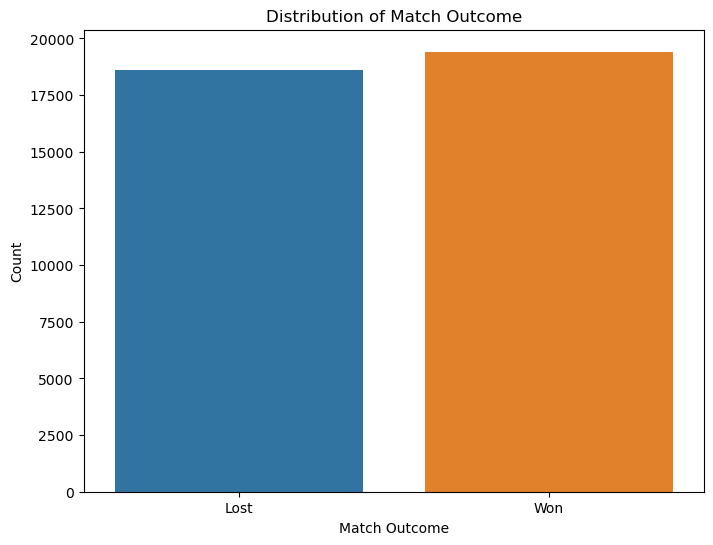

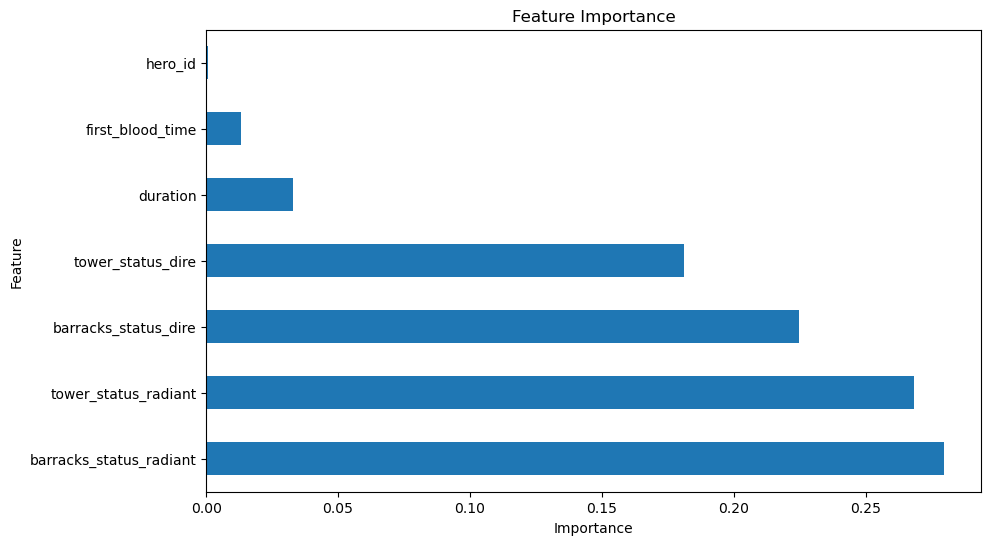

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='radiant_win', data=merged_df)
plt.title('Distribution of Match Outcome')
plt.xlabel('Match Outcome')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Lost', 'Won'])
plt.show()

# Plot feature importance
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(clf.feature_importances_, index=features.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



In [19]:
win_df = pd.read_csv(r'/Users/kanimozhivelusamy/Downloads/WinPercentage/Q13.csv')
win_df

,hero_id,wins,total_matches,win_percentage
0,87,449,831,54.03
1,71,149,319,46.71
2,68,31,58,53.45
3,51,158,313,50.48
4,70,122,238,51.26
...,...,...,...,...
119,27,60,110,54.55
120,129,209,434,48.16
121,23,383,735,52.11
122,58,154,339,45.43


/Users/kanimozhivelusamy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


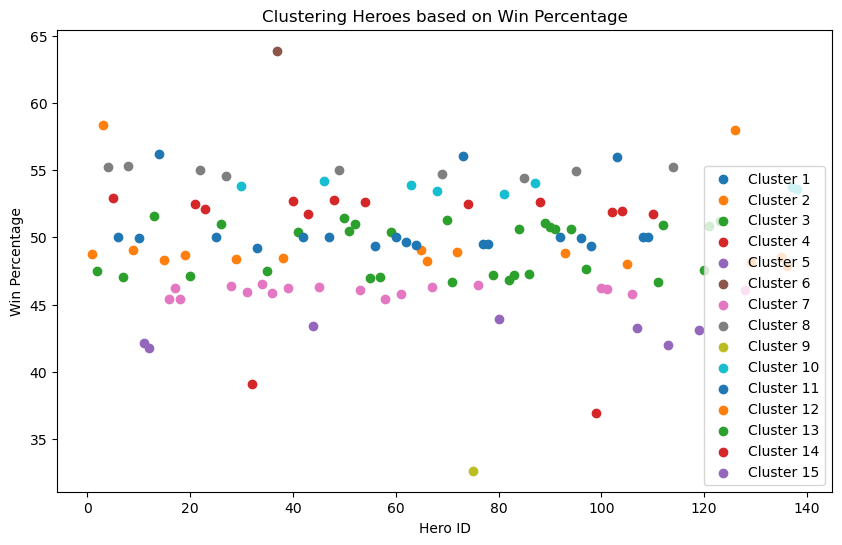

In [20]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



# Extracting the win percentage column for clustering
X = win_df[['win_percentage']]

num_clusters = 15

# Applying KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Adding the cluster labels to the DataFrame
win_df['cluster'] = kmeans.labels_

# Visualizing the clusters
plt.figure(figsize=(10, 6))
for cluster_label in range(num_clusters):
    cluster_data = win_df[win_df['cluster'] == cluster_label]
    plt.scatter(cluster_data['hero_id'], cluster_data['win_percentage'], label=f'Cluster {cluster_label + 1}')

plt.xlabel('Hero ID')
plt.ylabel('Win Percentage')
plt.title('Clustering Heroes based on Win Percentage')
plt.legend()
plt.show()
